# Stephen Alger, C16377163, Week 5 Work
---

Review the notebook / R file Multiline and melt (see Week 5 folder).
Review the notebook / R file Week 5 Relationships example.

Download the csv from https://www.kaggle.com/ravivarmat/housing and undertake the following tasks: ( .5 marks each)

* Use a chart to show positive correlations in the data.
* Pick two pairs of data that you believe are positively correlated and generate charts plotting them against each other.
* Use a chart to show the proportions of houses, depending on ocean proximity.
* Use two types of chart to show the distribution of values of median income.

In your own words, explain: (1 mark) 
* Mean, mode, median
* Pearson Correlation Coefficient

In [131]:
# Header
install.packages("PerformanceAnalytics")
install.packages("corrplot")


library(tidyverse)
library(reshape2)
library(corrplot)
library(RColorBrewer)
library("PerformanceAnalytics")
options(repr.plot.width=16,repr.plot.height=16)

#Define my Own Theme                           
my_Theme <- theme(plot.title = element_text(face="bold",size=20),
                  plot.subtitle = element_text(face="italic", size = 12),
                  axis.title = element_text(face="bold",size=20),
                  axis.text = element_text(size=20),
                  plot.caption = element_text(size = 14))
                           


The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//RtmpMAVv81/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//RtmpMAVv81/downloaded_packages


In [132]:
dfsource<-"./data/housing.csv"
housing <- read.csv(dfsource, stringsAsFactors = F)
head(housing)
str(housing)

longitude latitude housing_median_age total_rooms total_bedrooms population
1 -122.23   37.88    41                  880         129            322      
2 -122.22   37.86    21                 7099        1106           2401      
3 -122.24   37.85    52                 1467         190            496      
4 -122.25   37.85    52                 1274         235            558      
5 -122.25   37.85    52                 1627         280            565      
6 -122.25   37.85    52                  919         213            413      
  households median_income median_house_value ocean_proximity
1  126       8.3252        452600             NEAR BAY       
2 1138       8.3014        358500             NEAR BAY       
3  177       7.2574        352100             NEAR BAY       
4  219       5.6431        341300             NEAR BAY       
5  259       3.8462        342200             NEAR BAY       
6  193       4.0368        269700             NEAR BAY

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : chr  "NEAR BAY" "NEAR BAY" "NEAR BAY" "NEAR BAY" ...


# Use a chart to show positive correlations in the data.
---

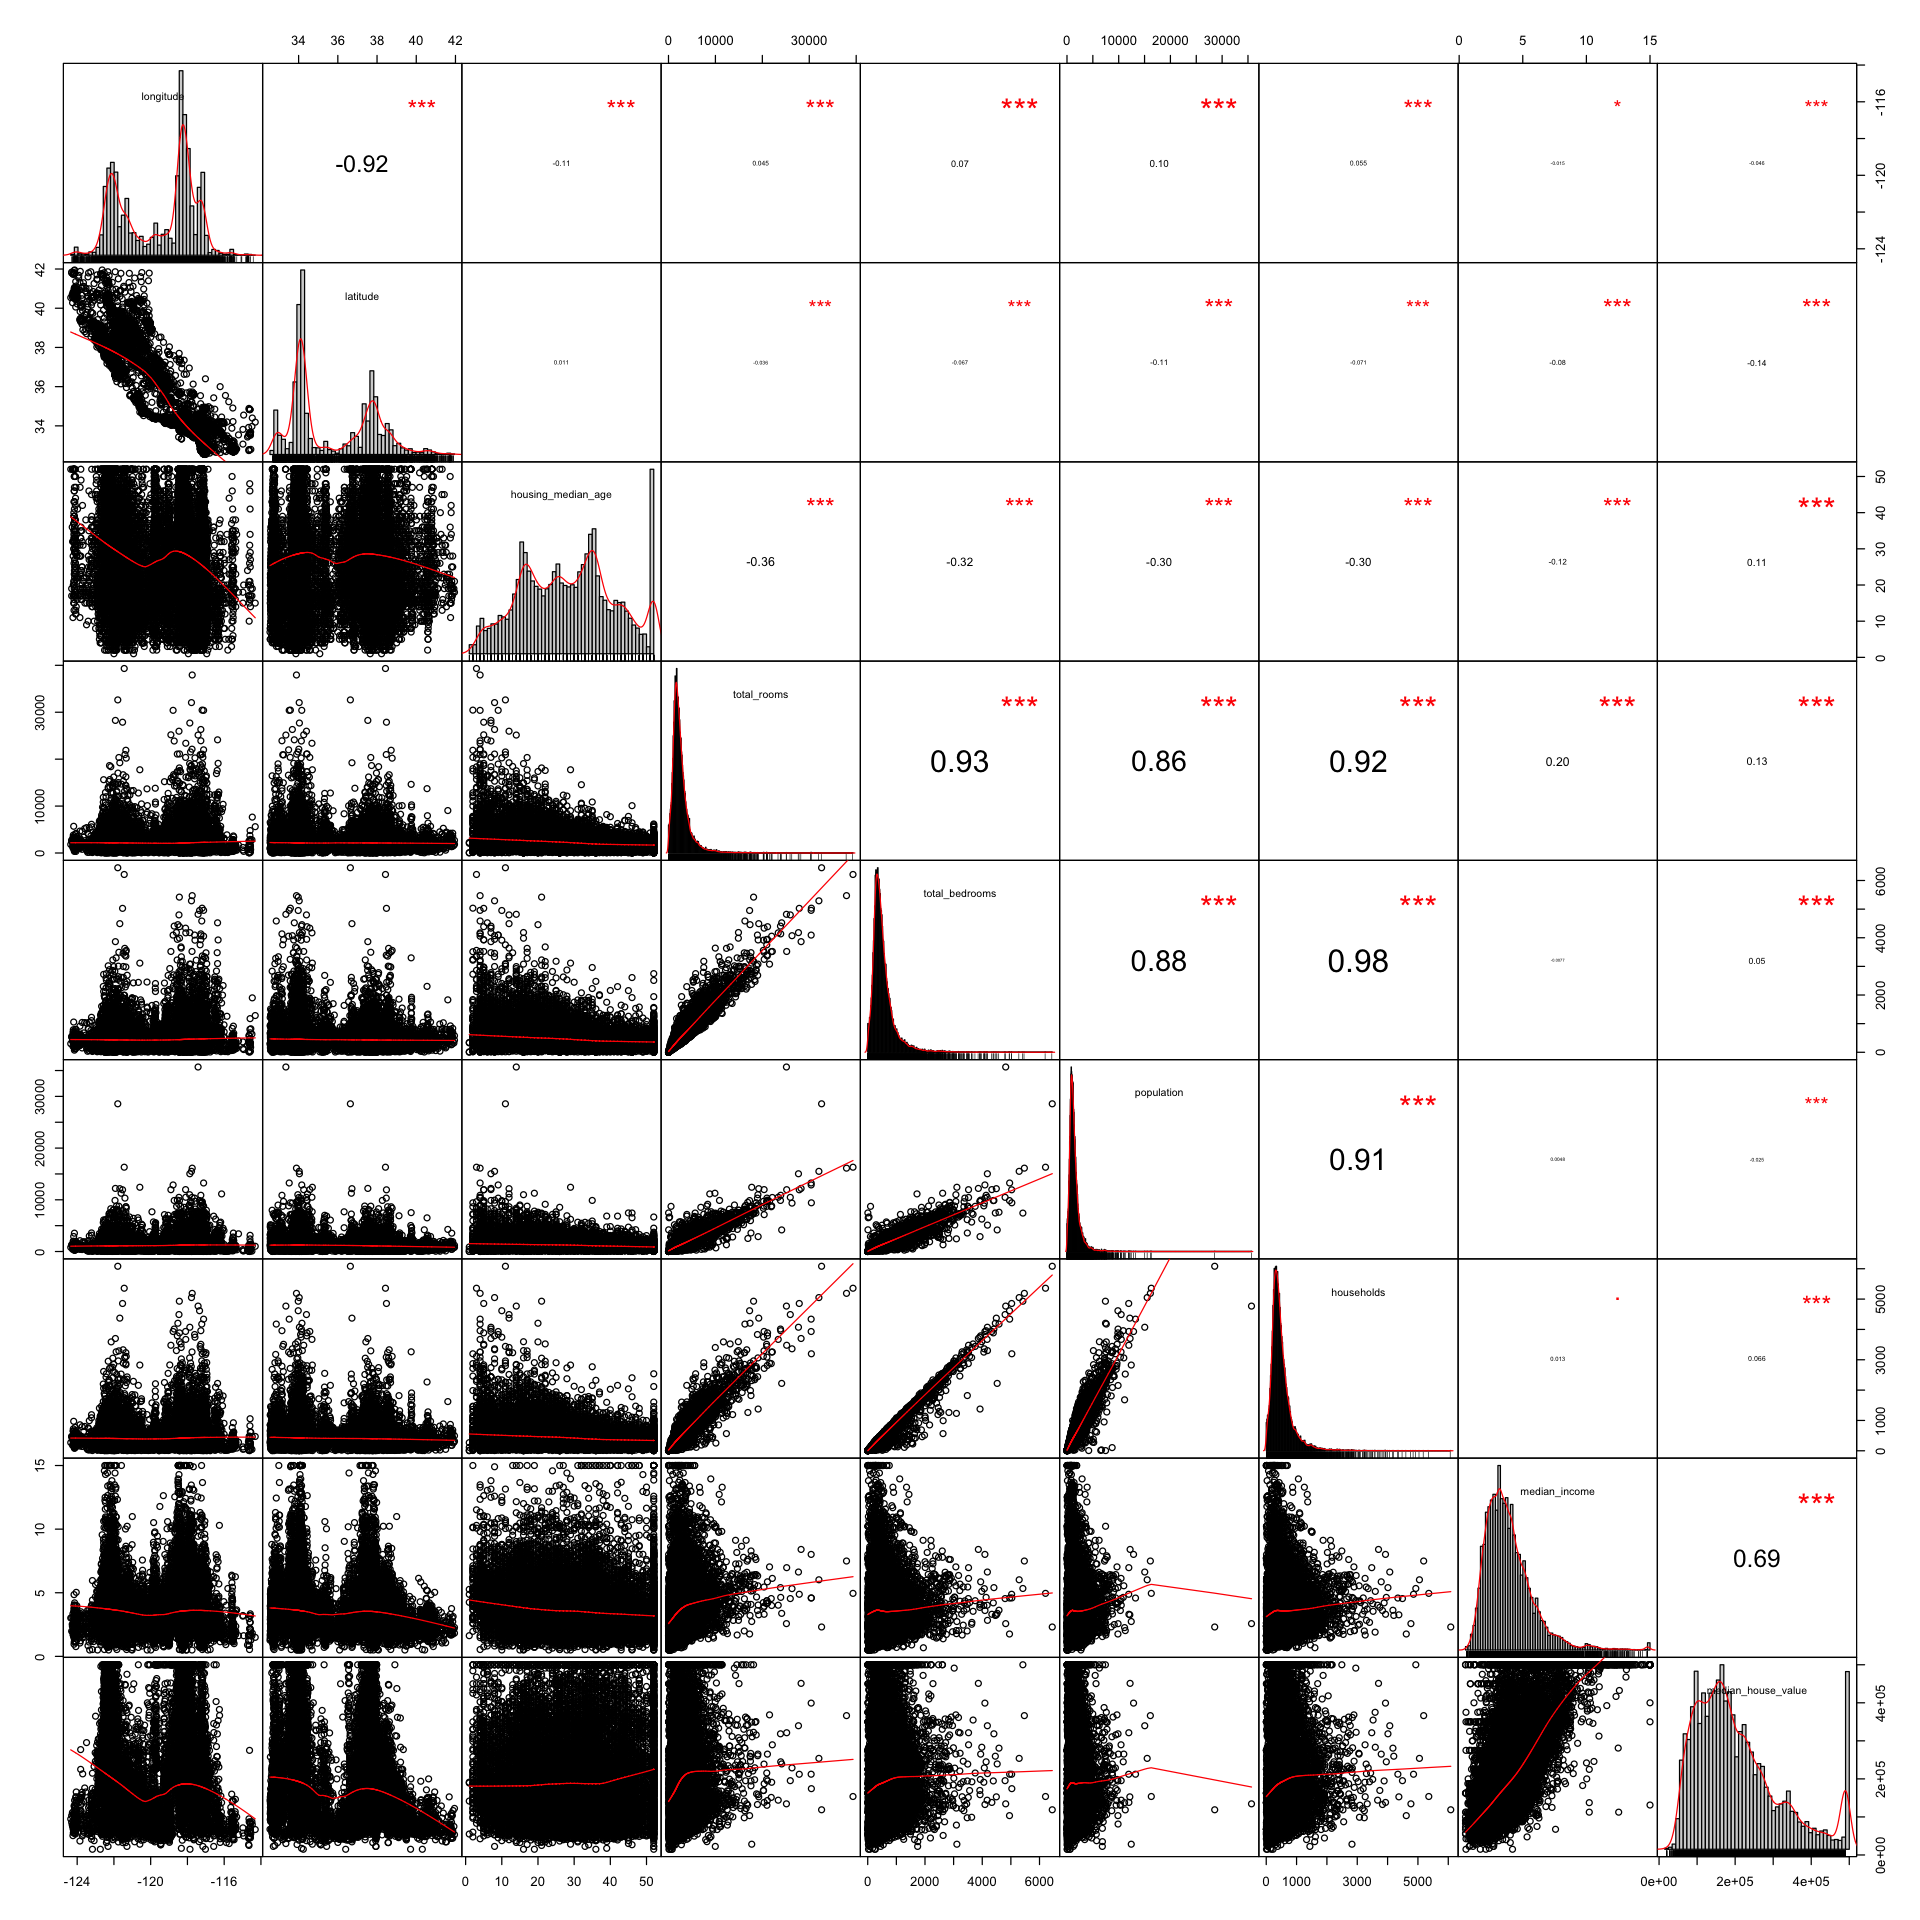

In [133]:
# chart.Correlation(housing, histogram=TRUE)

# Isolate only the numerical data
numericalDF <- subset(housing, select = -c(ocean_proximity))
# df = subset(mydata, select = -c(x,z) )
chart.Correlation(numericalDF, histrogram=T,method = c("pearson") )


# Pick two pairs of data that you believe are positively correlated and generate charts plotting them against each other.
---


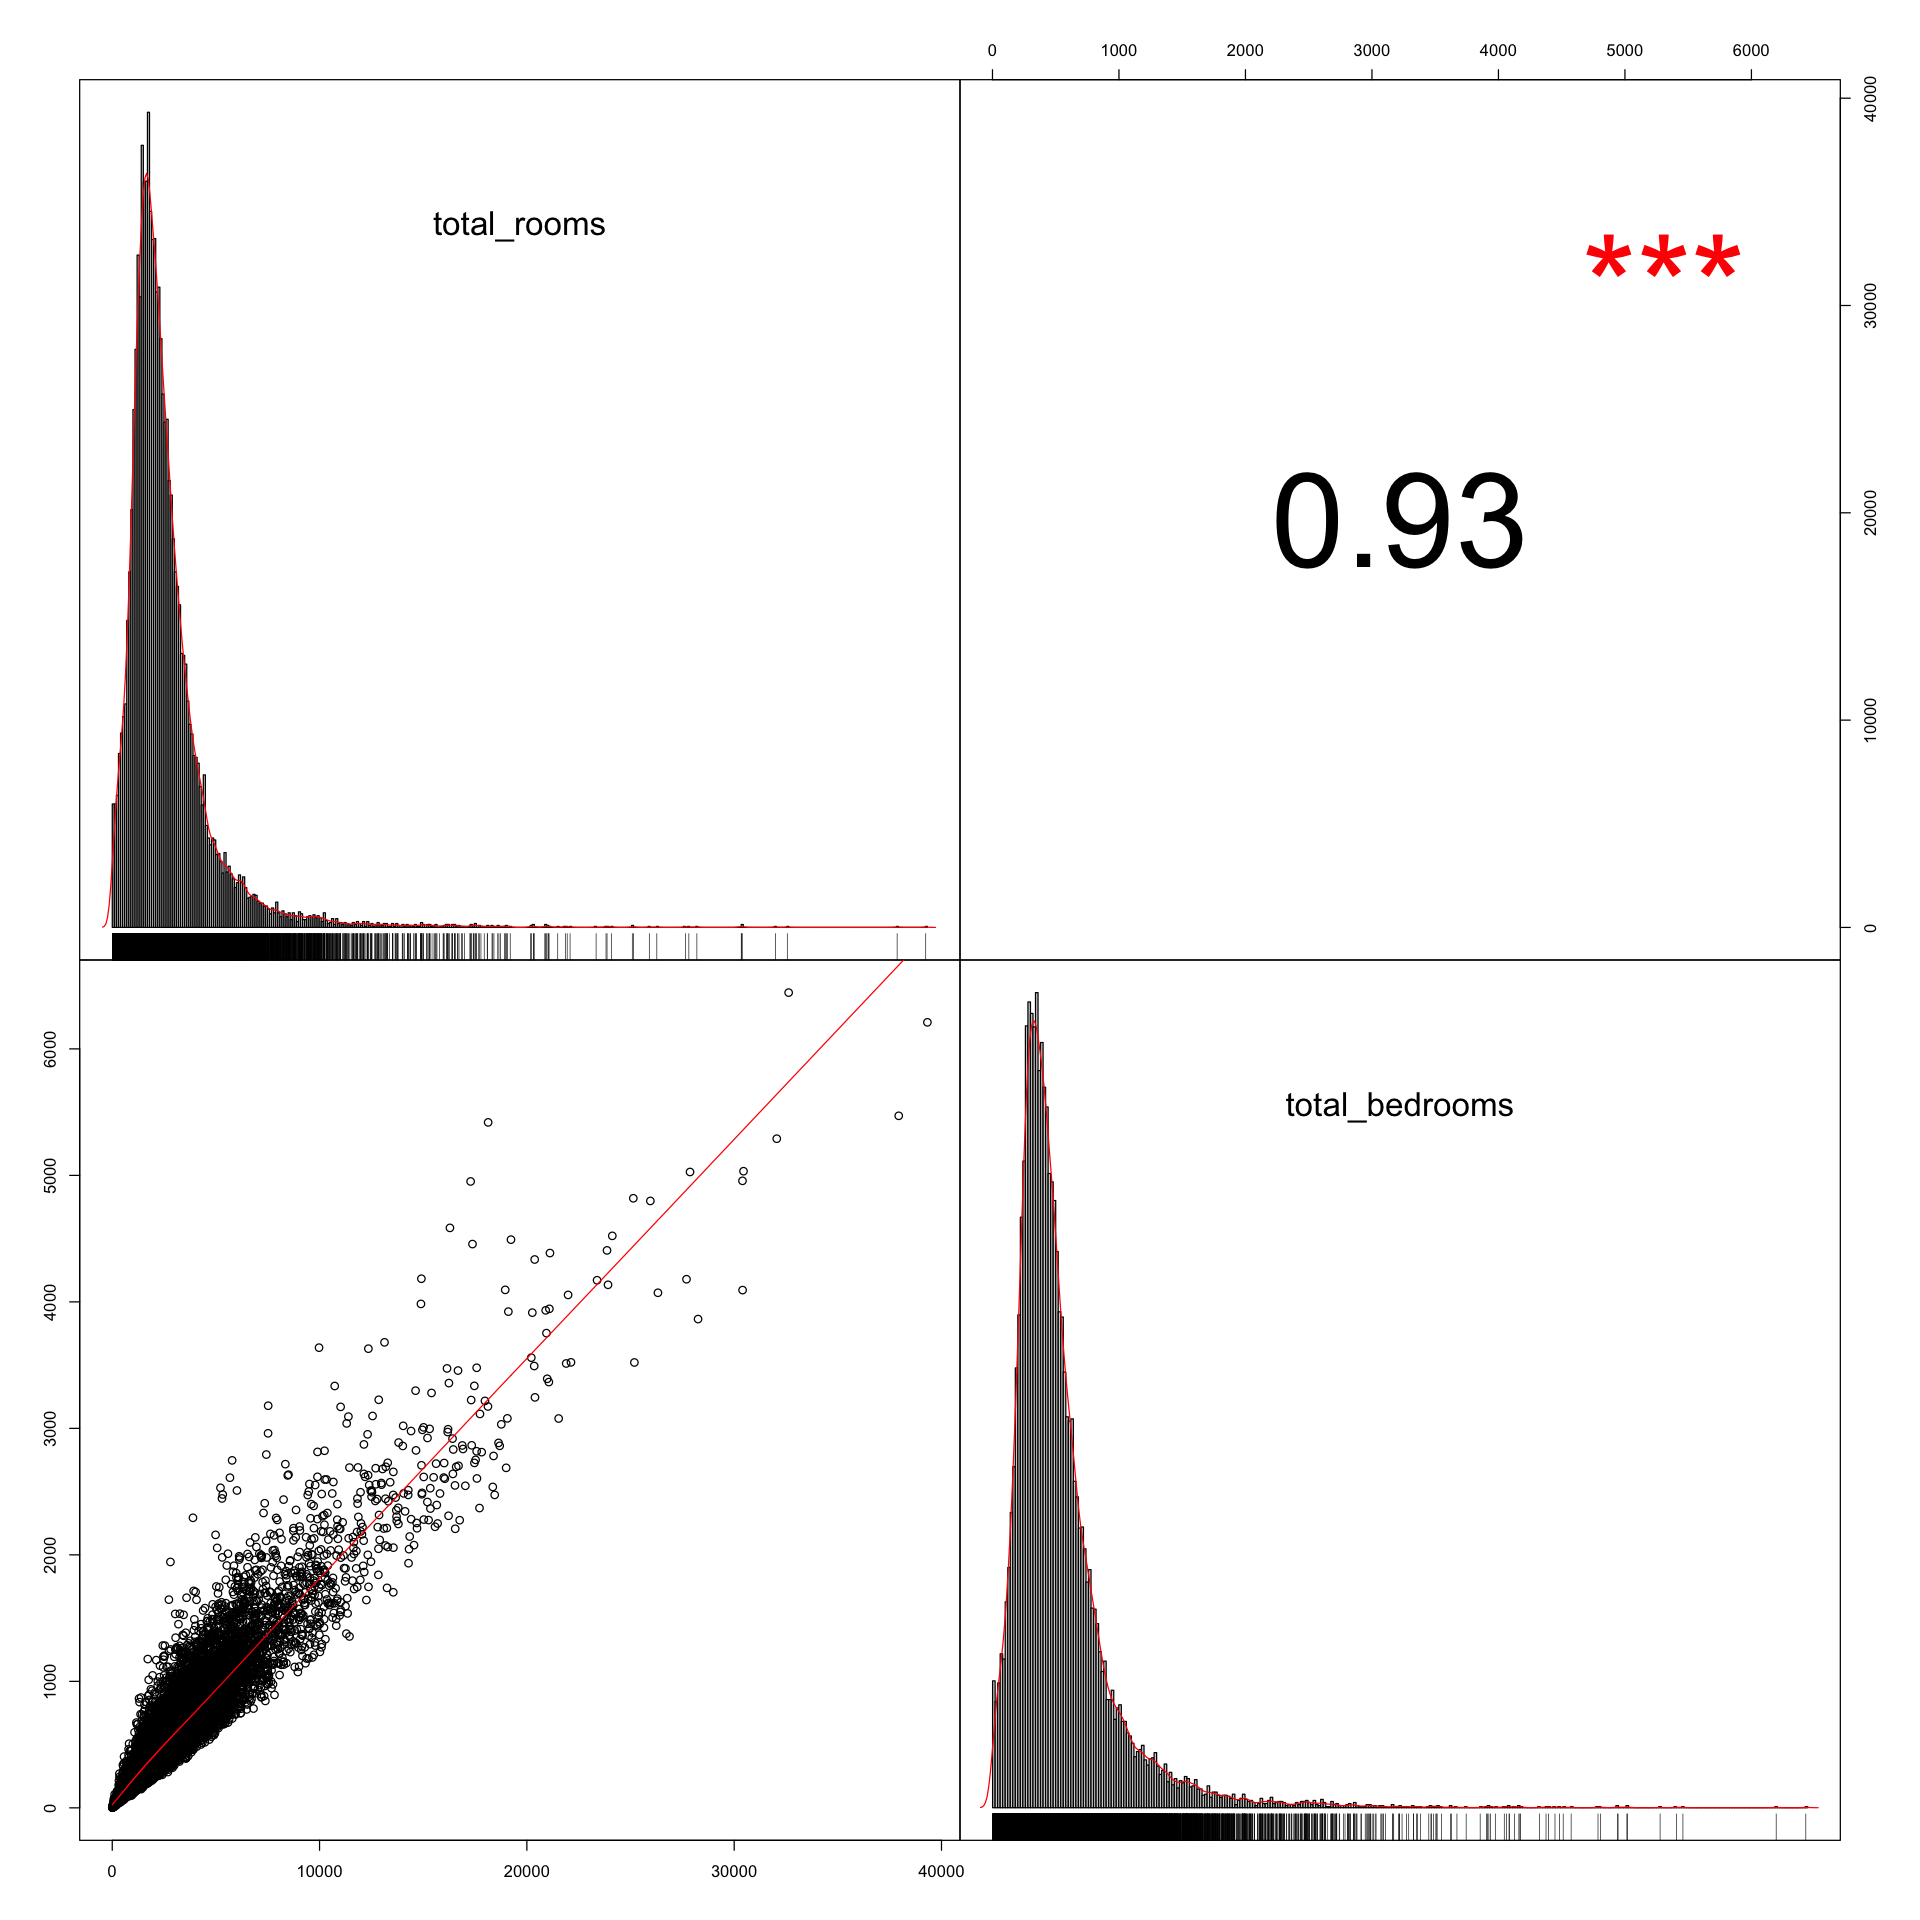

In [134]:
# Pair One: Positive Correlation #1
subset(housing, select = c(total_rooms, total_bedrooms)) %>%
chart.Correlation(histrogram=T,method = c("pearson") )

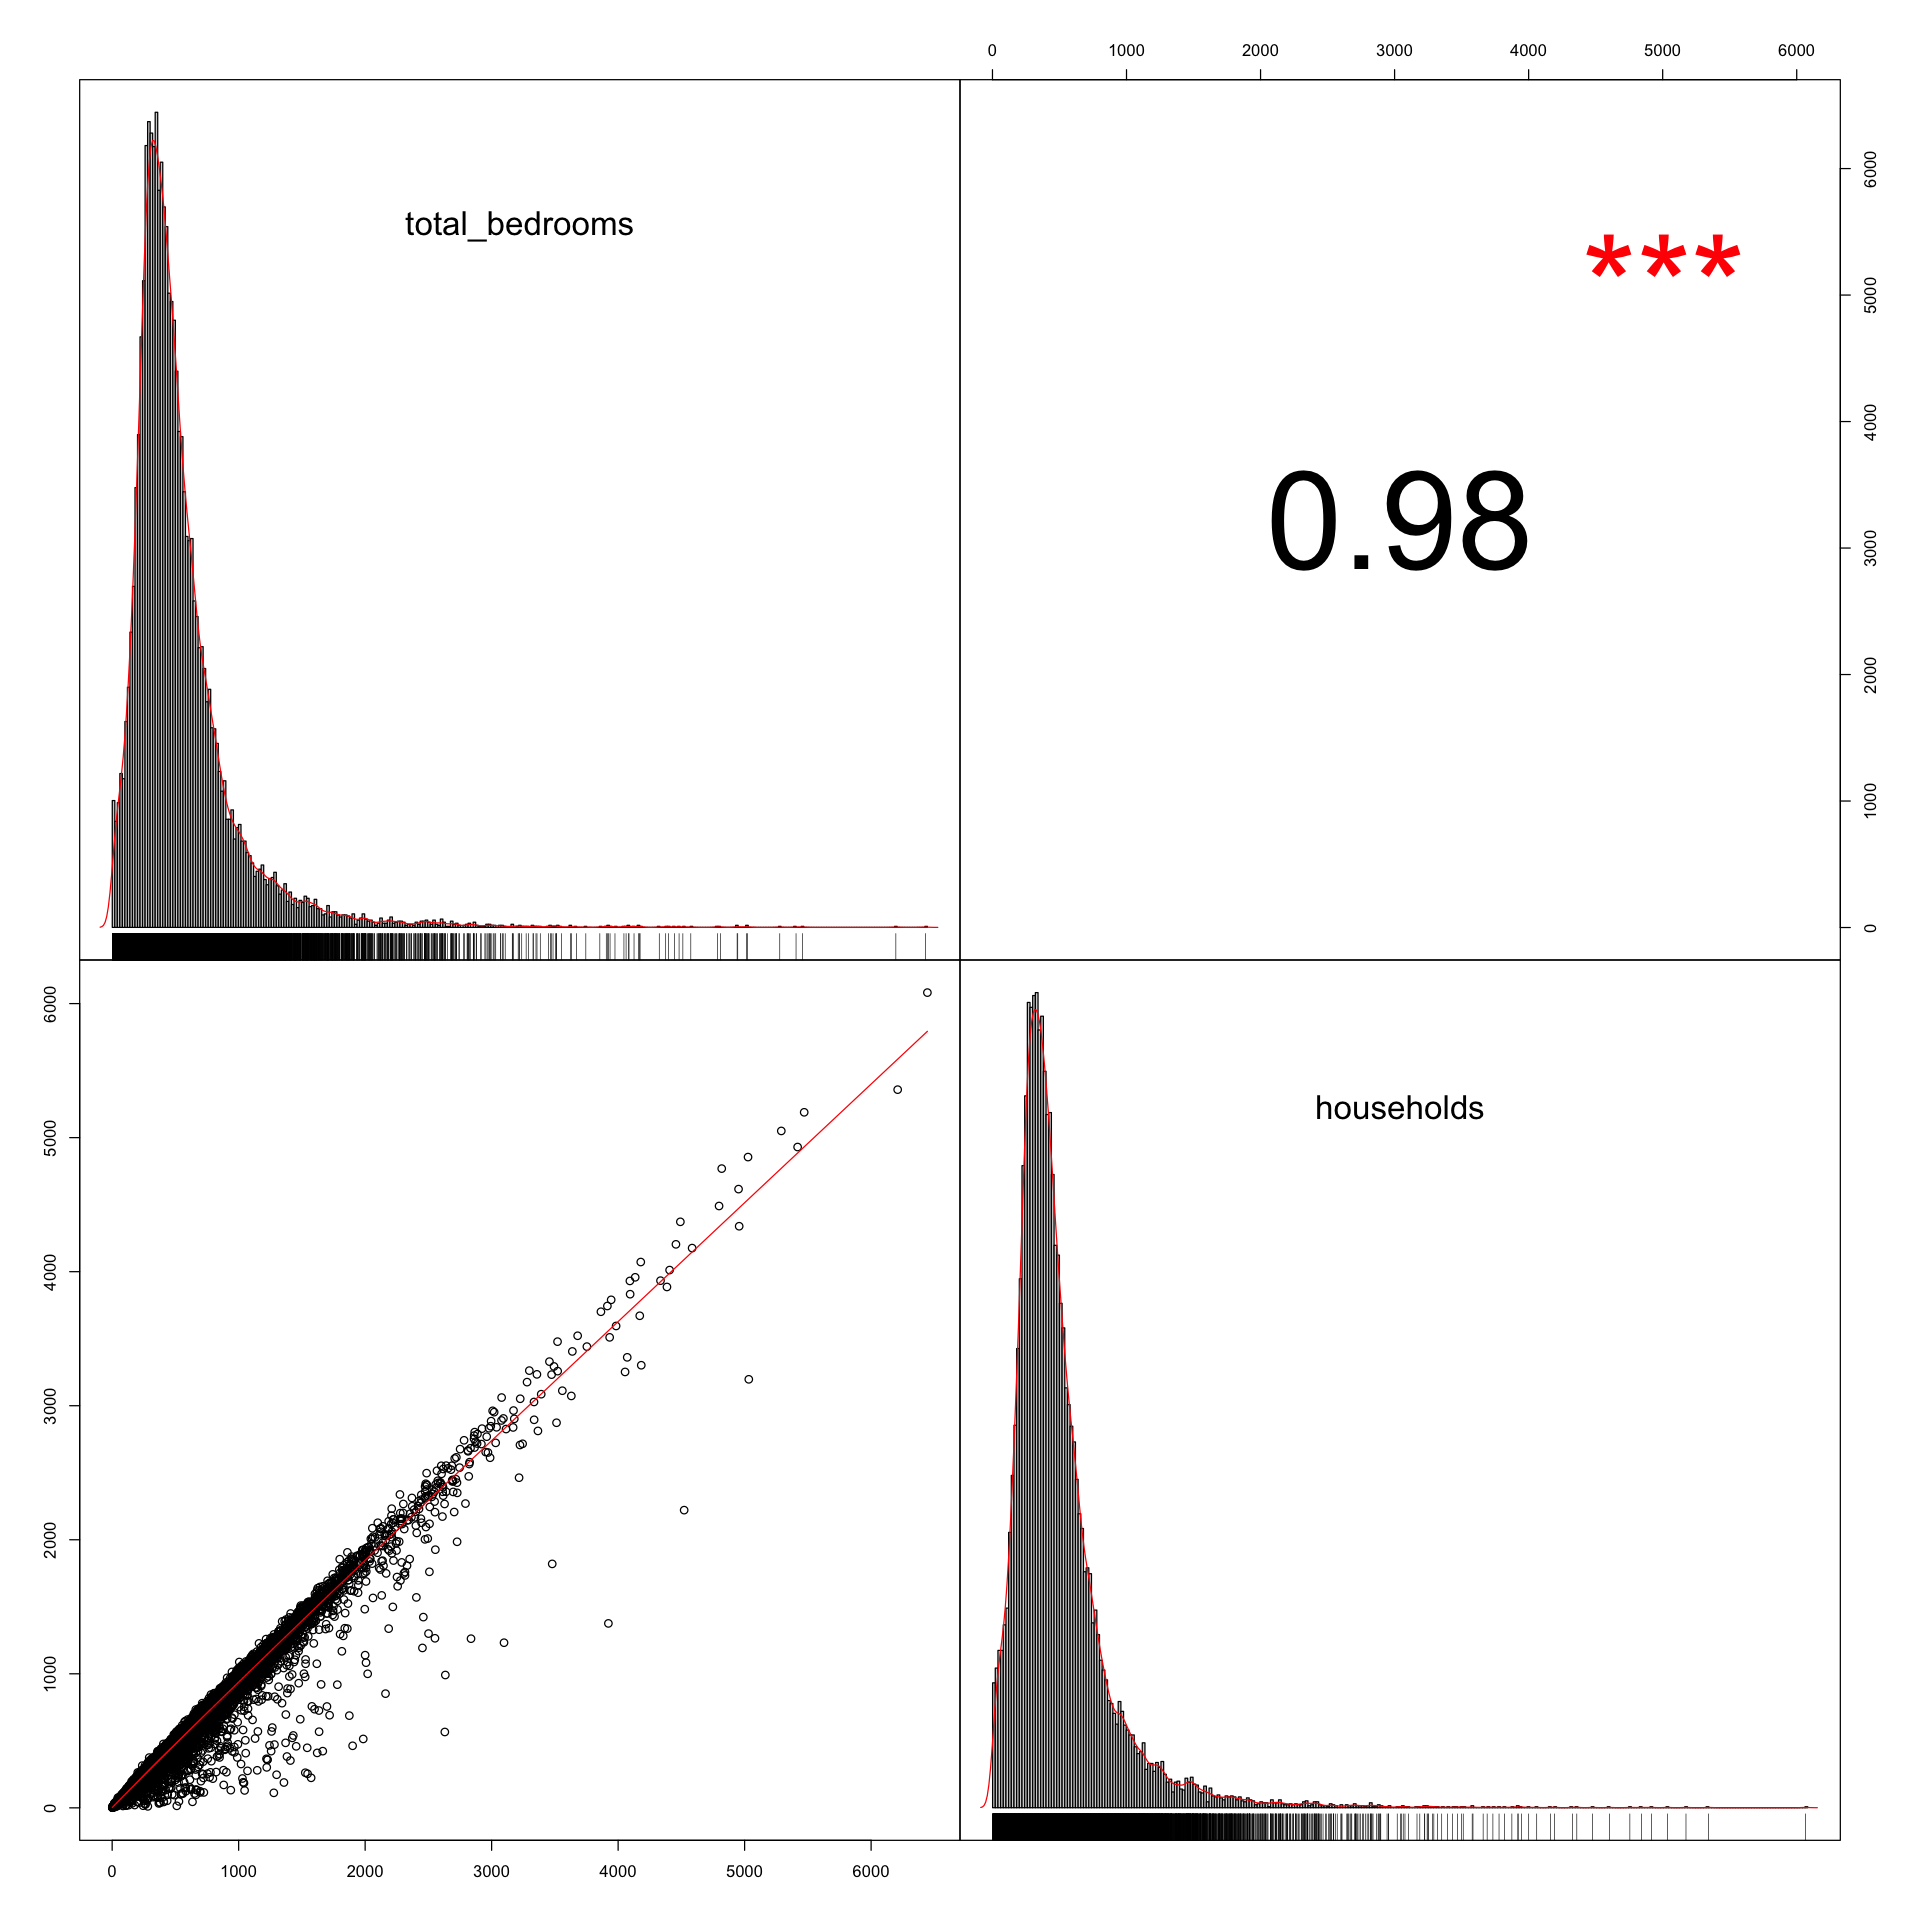

In [135]:
# Pair Two: Positive Correlation #2
subset(housing, select = c(total_bedrooms, households)) %>%
chart.Correlation(histrogram=T,method = c("pearson") )

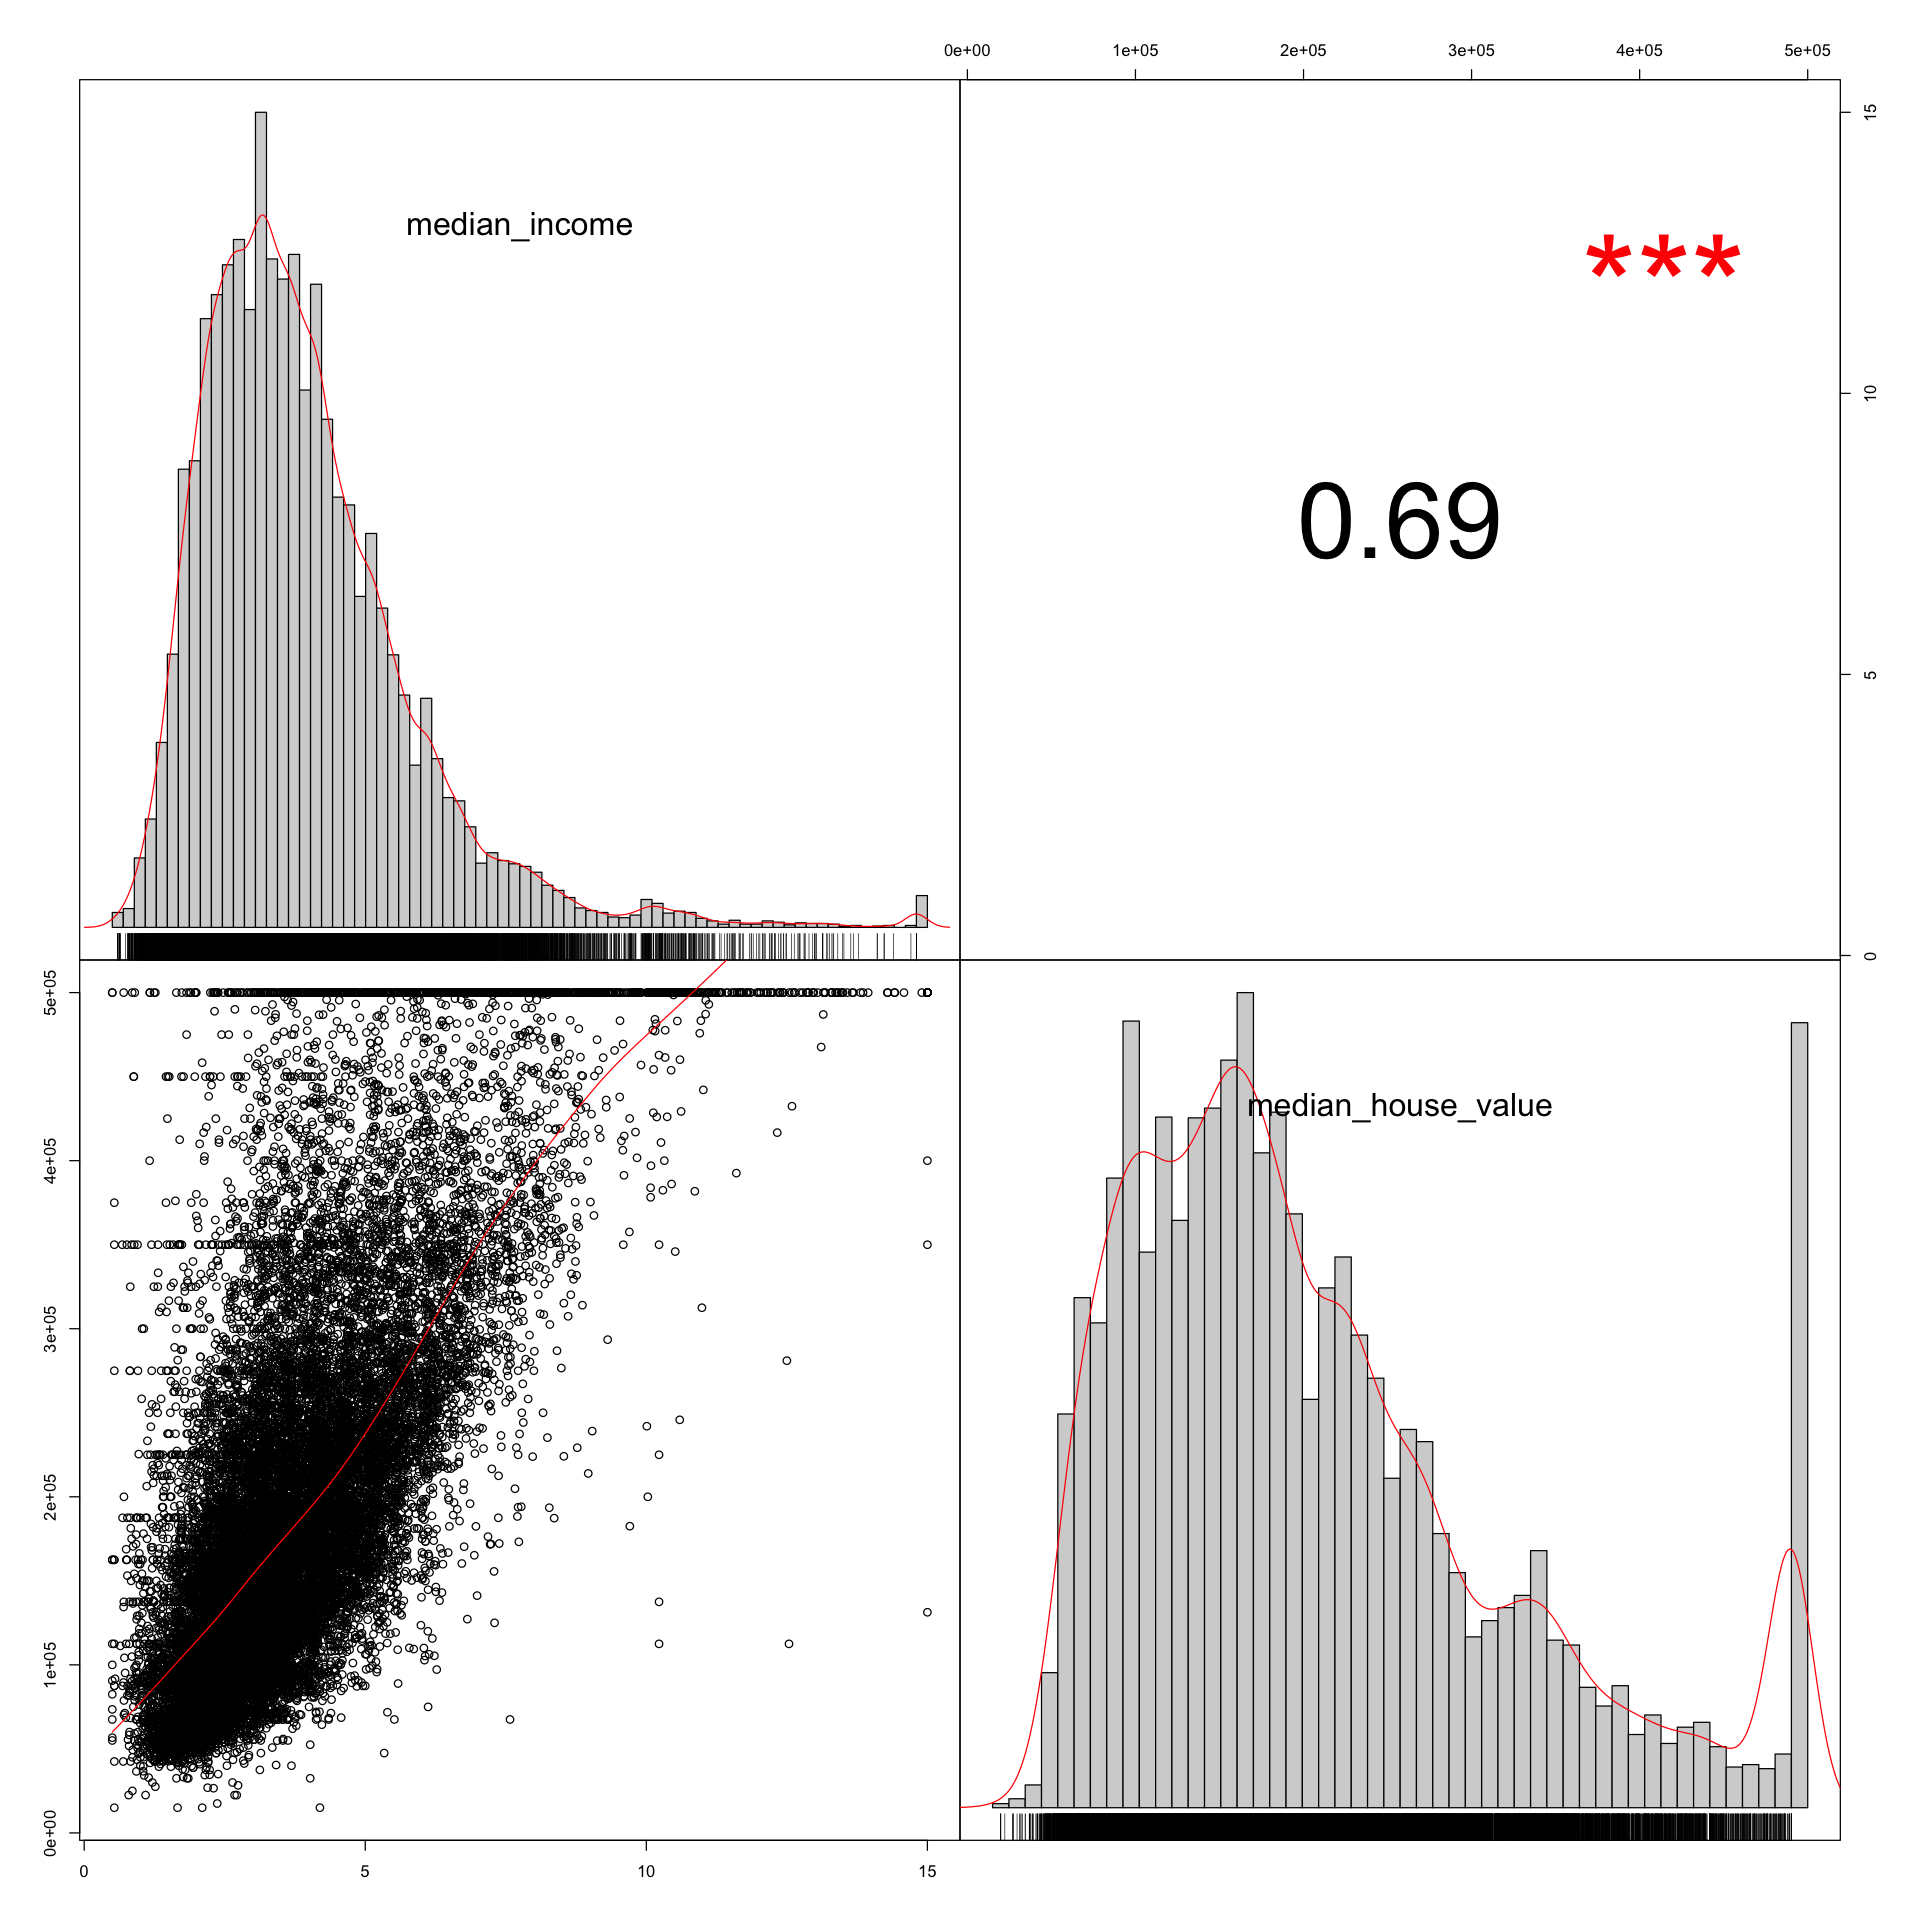

In [136]:
# Pair Three: Real-World Meaningful Correlation
subset(housing, select = c(median_income, median_house_value)) %>%
chart.Correlation(histrogram=T,method = c("pearson") )

# Use a chart to show the proportions of houses, depending on ocean proximity.
---

In [137]:
# Show all distinct Area values
distinctProximityValues <- housing %>% distinct(ocean_proximity) %>% select(ocean_proximity)
head(distinctProximityValues)

ocean_proximity
1 NEAR BAY       
2 <1H OCEAN      
3 INLAND         
4 NEAR OCEAN     
5 ISLAND

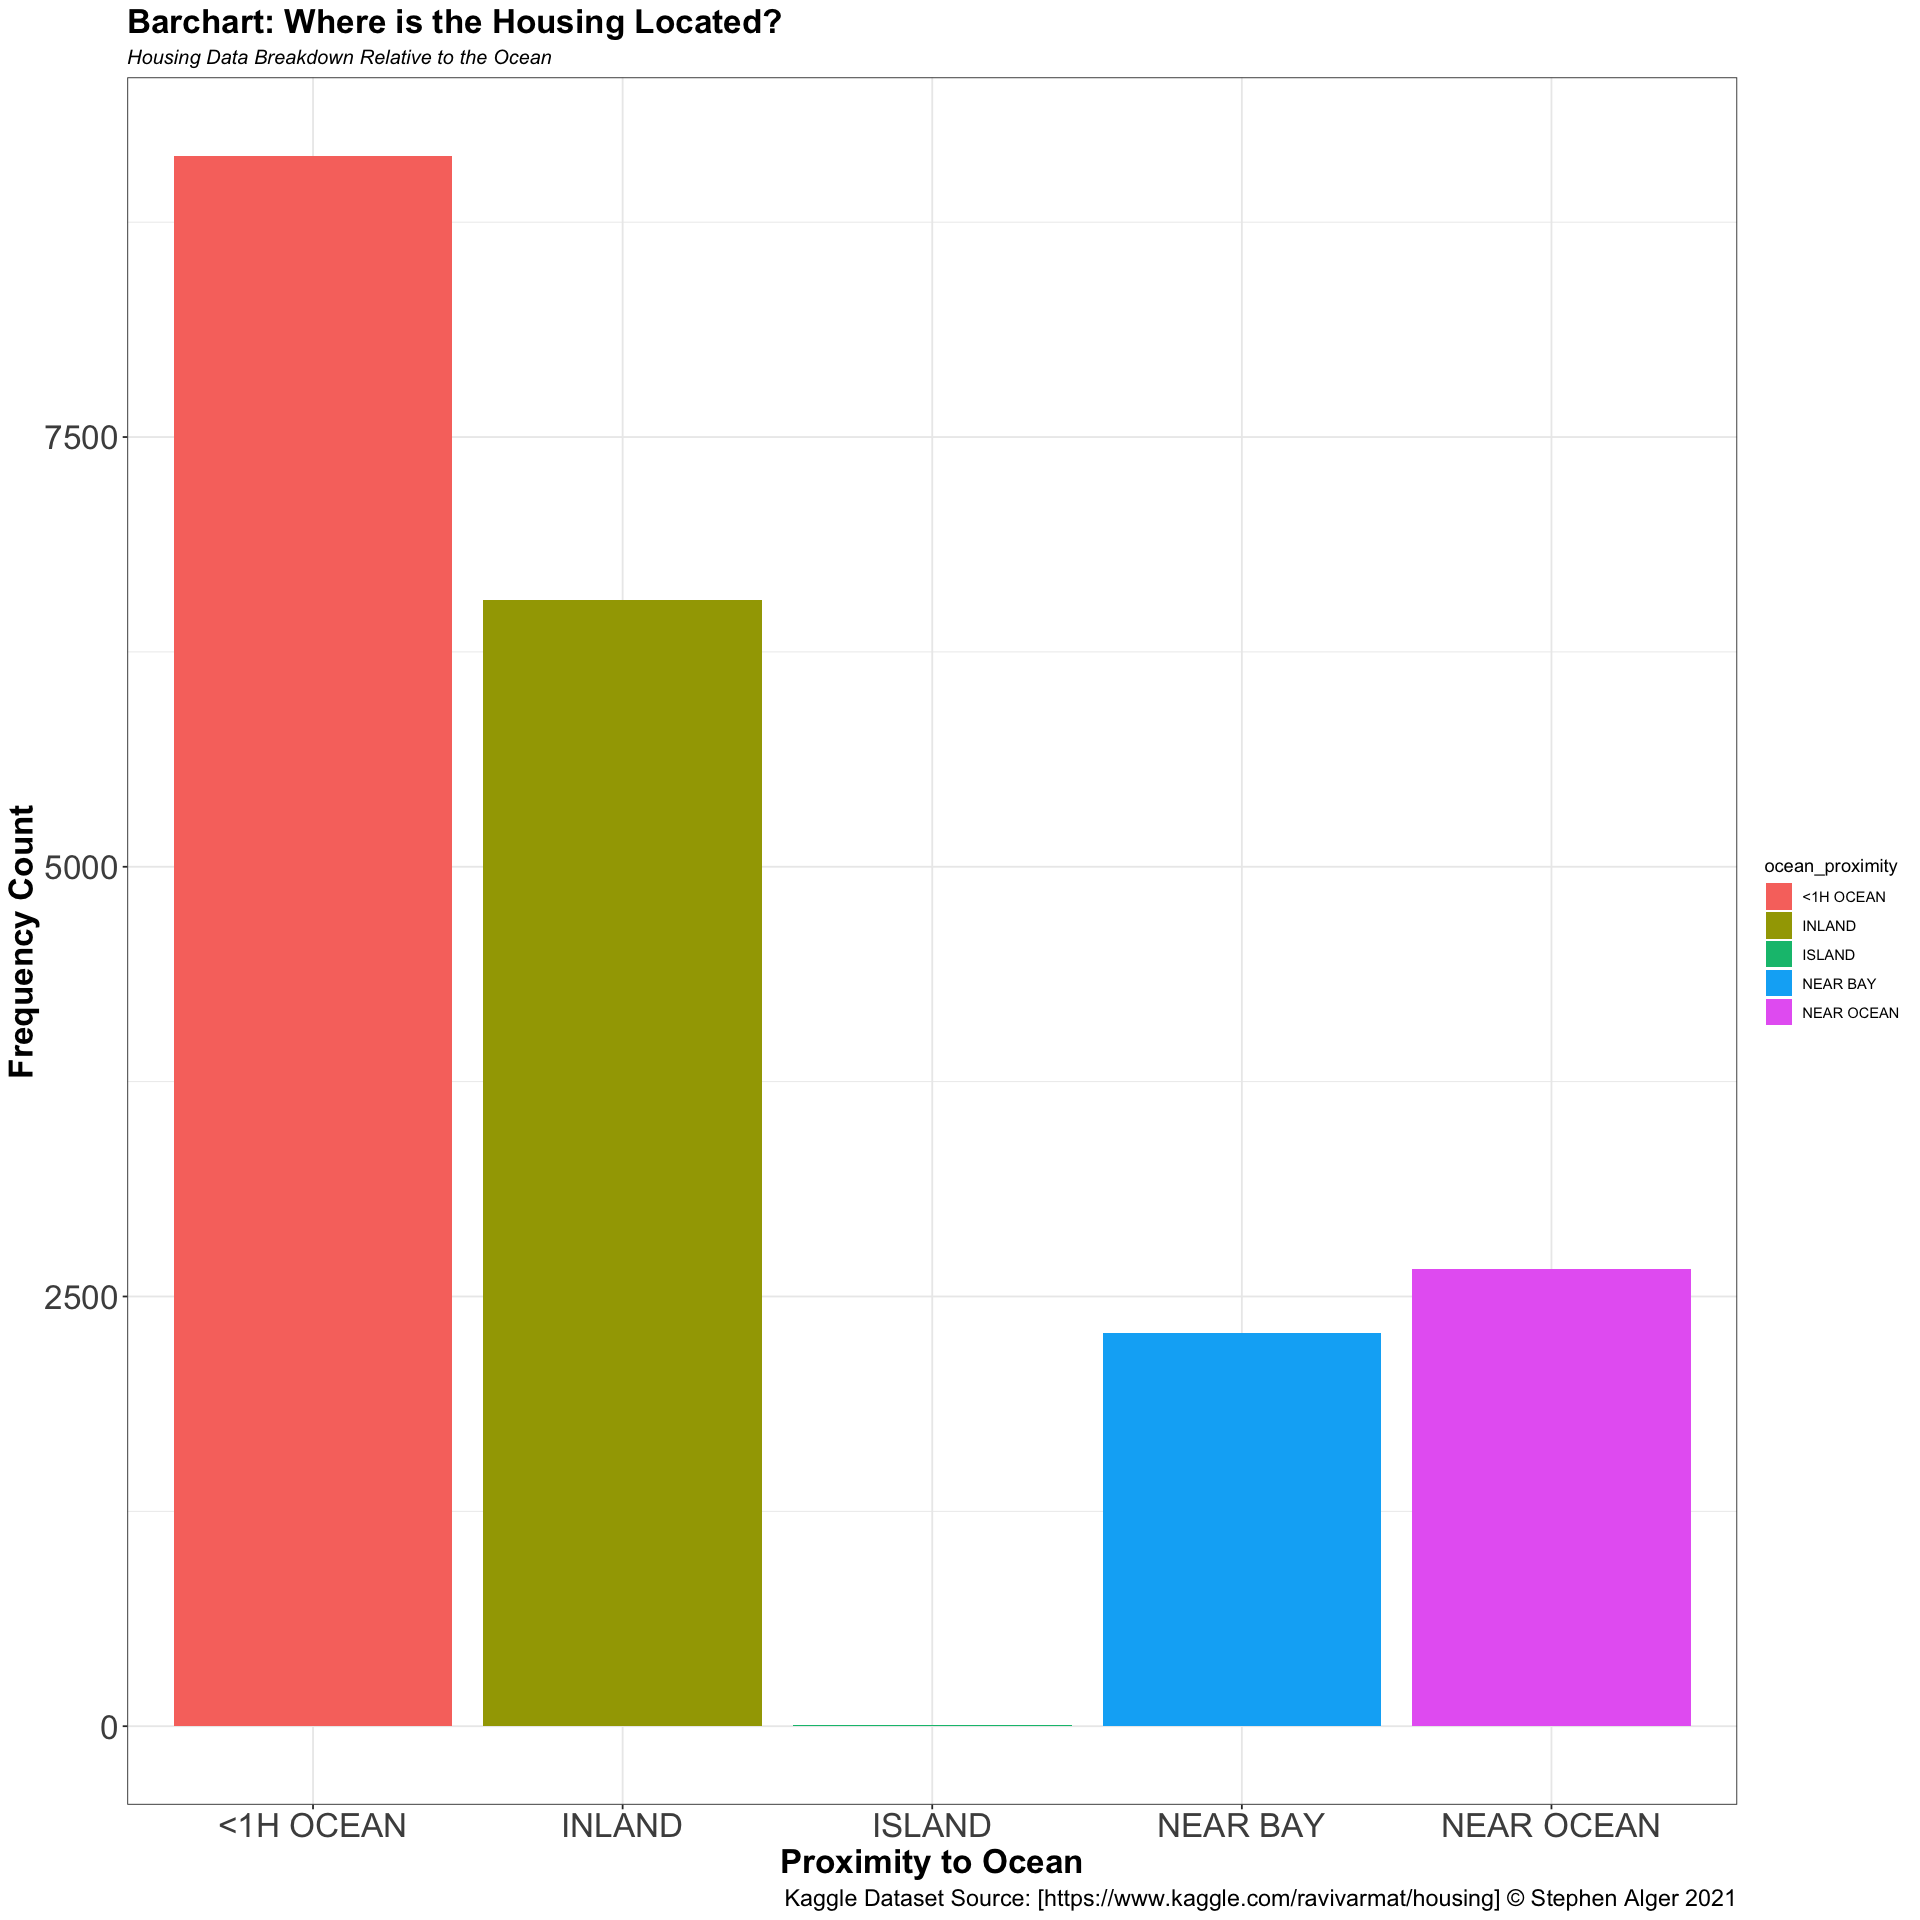

In [141]:
housing %>% 
    ggplot(aes(x=factor(ocean_proximity), fill=ocean_proximity)) +
    geom_bar() +
    theme_bw()+my_Theme+
    labs(x = "Proximity to Ocean", y="Frequency Count",
        title="Barchart: Where is the Housing Located?",
        subtitle="Housing Data Breakdown Relative to the Ocean",
        caption="Kaggle Dataset Source: [https://www.kaggle.com/ravivarmat/housing] © Stephen Alger 2021") 

# Use two types of chart to show the distribution of values of median income.
---

`geom_smooth()` using formula 'y ~ x'



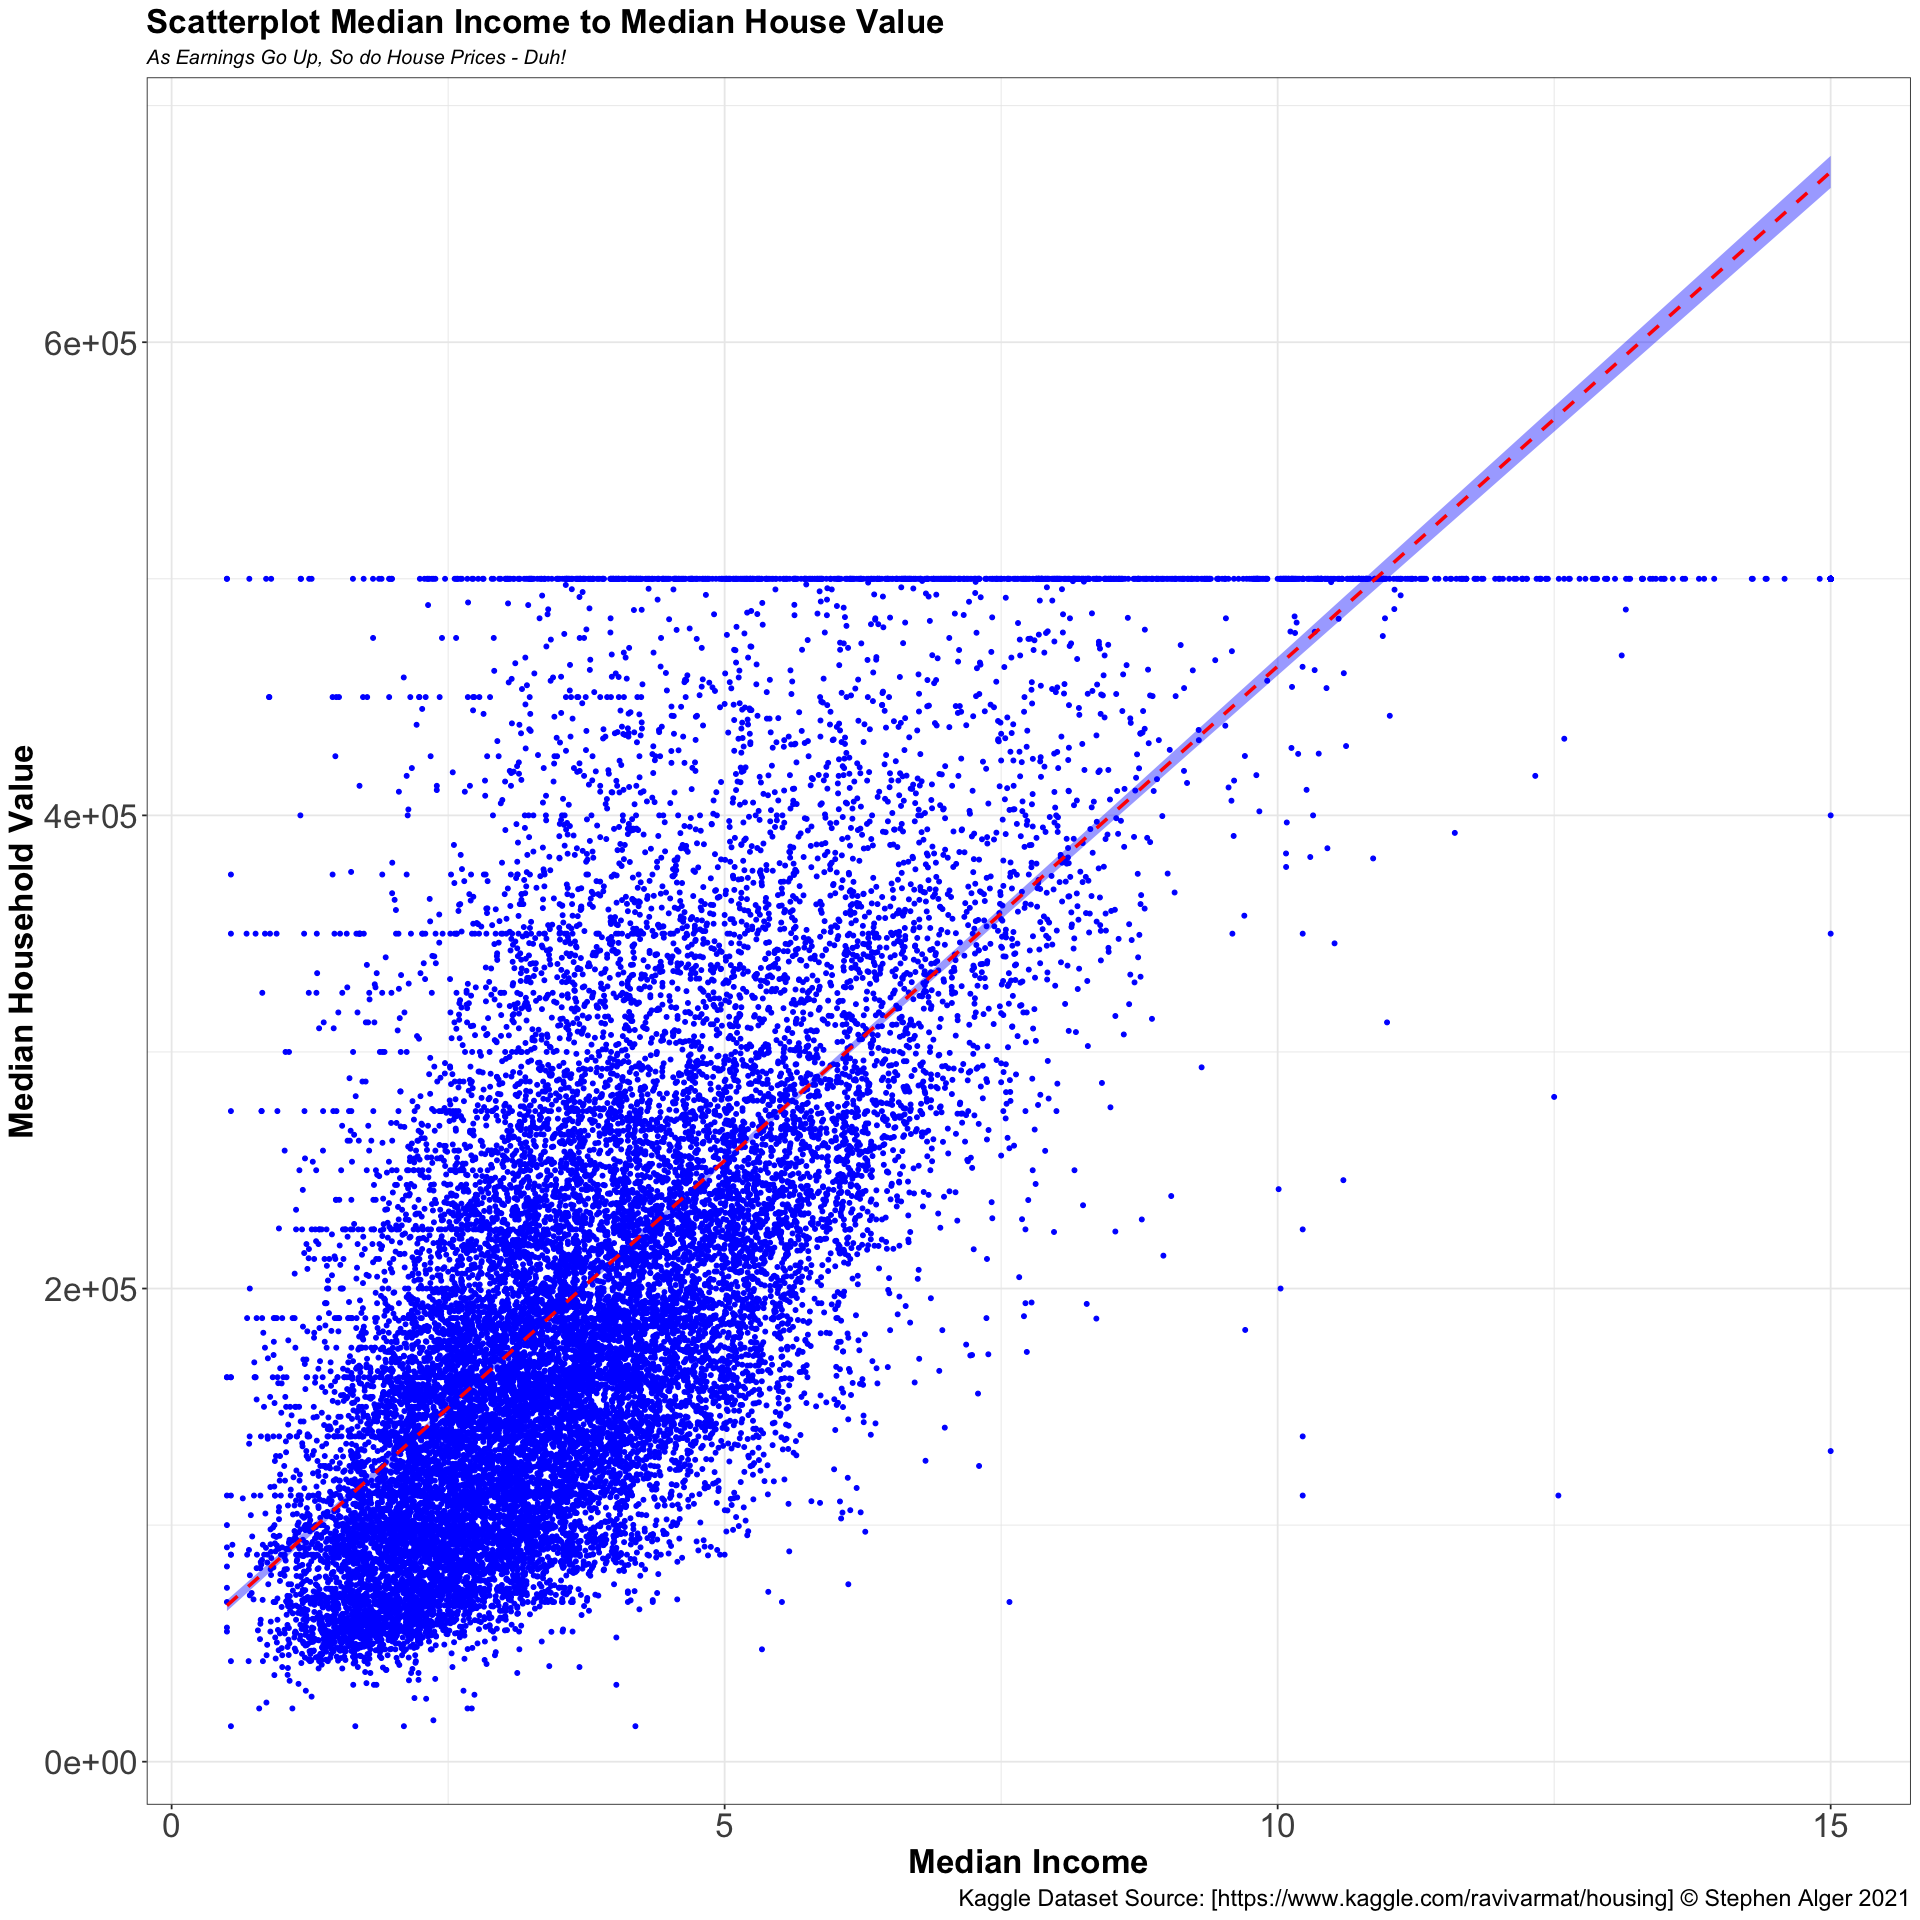

In [142]:
# Scatterplot Median Income to Median House Value

ggplot(housing, aes(x=median_income, y=median_house_value)) + 
  geom_point(color="blue", size=1)+
  geom_smooth(method=lm,  linetype="dashed",color="red", fill="blue")+
    theme_bw()+my_Theme+
    labs(x = "Median Income", y="Median Household Value",
        title="Scatterplot Median Income to Median House Value",
        subtitle="As Earnings Go Up, So do House Prices - Duh!",
        caption="Kaggle Dataset Source: [https://www.kaggle.com/ravivarmat/housing] © Stephen Alger 2021") 



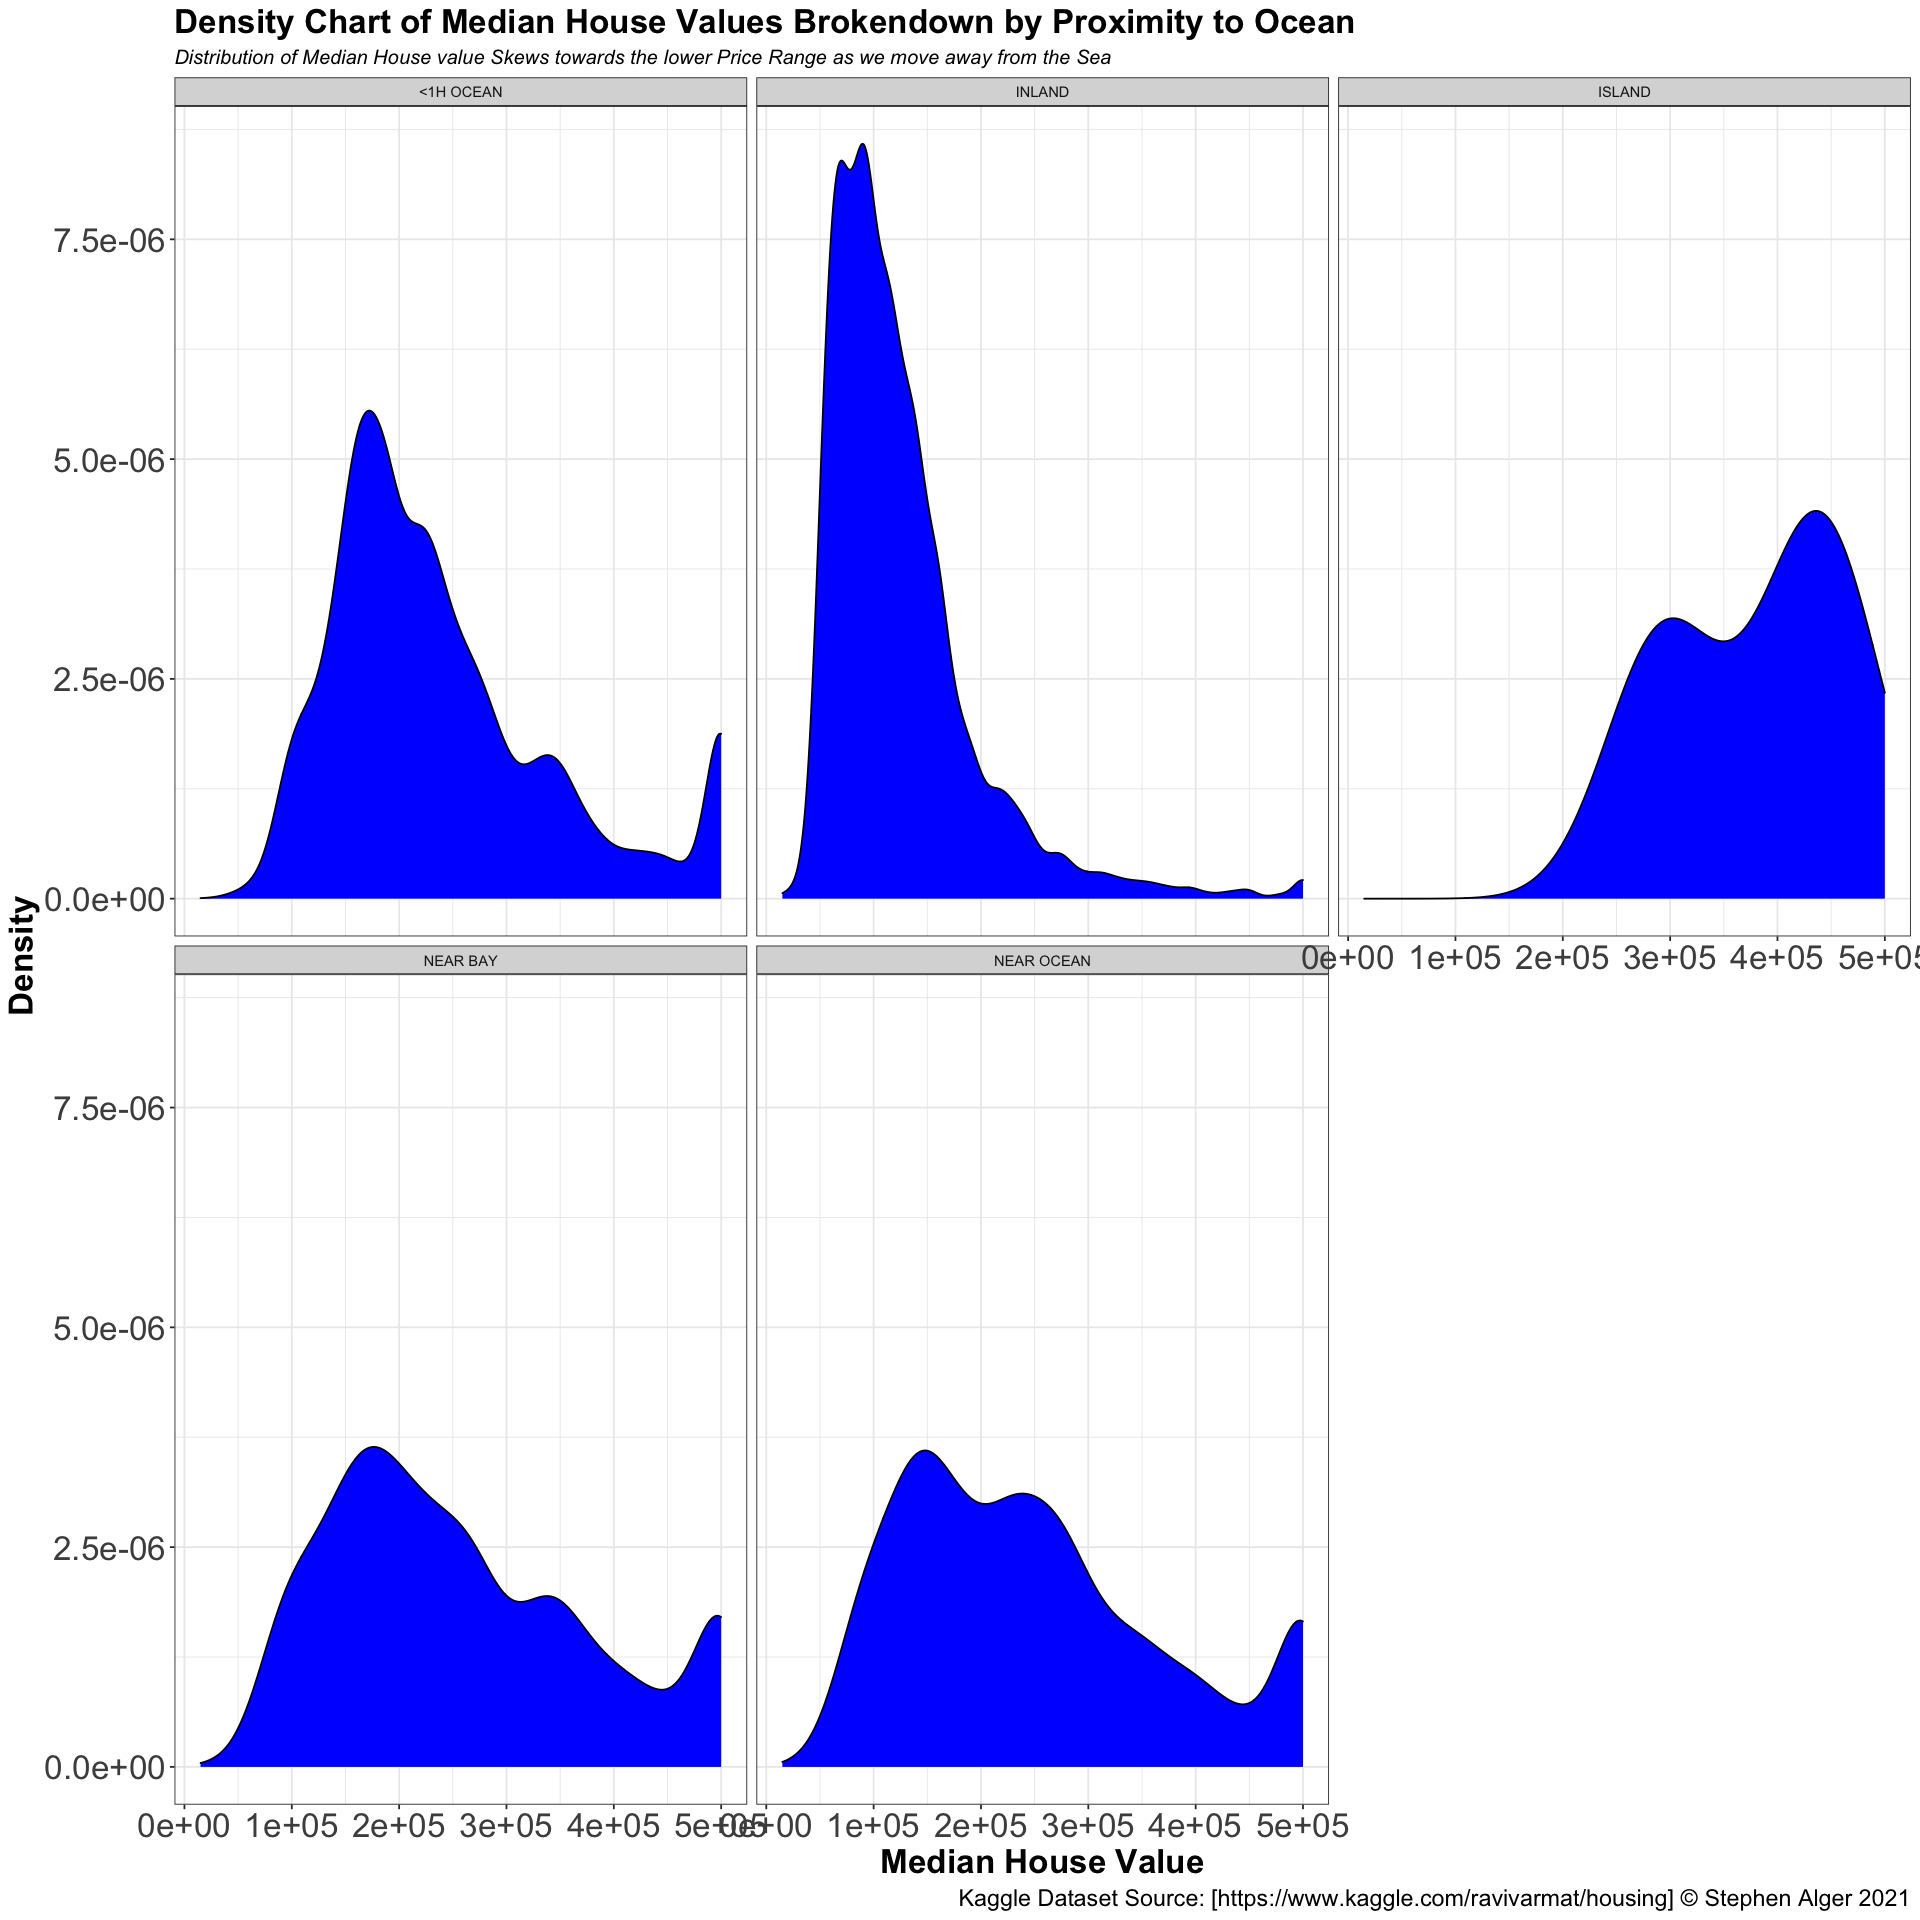

In [143]:
# Facet Wrap: Density Chart Segregated by Porximity to Ocean
housing %>% 
    ggplot(aes(x = median_house_value)) +
    geom_density(fill="blue")+
    theme_bw()+my_Theme+
    facet_wrap(~ocean_proximity)+
    labs(x = "Median House Value", y="Density",
        title="Density Chart of Median House Values Brokendown by Proximity to Ocean",
        subtitle="Distribution of Median House value Skews towards the lower Price Range as we move away from the Sea",
        caption="Kaggle Dataset Source: [https://www.kaggle.com/ravivarmat/housing] © Stephen Alger 2021") 

---
# Explain:

* **Mean** is the average value which occurs in a data set. Calculated by adding all values in a dataset and dividing by the total number of datapoints.
---
* **Mode** is the most oftenly occuring data value in a data set.
---
* **Median** is the middle value of a dataset when ordered from lowest to highest value.
---
* **The Pearson Co-efficient** is an expression of correlation in a dataset with values in the [-1,+1] range. It provides us with a Triad of inferences about a correlation. It is a ratio of [Y Scatter Variance]:[Variance around the Line of Best Fit]

 1. **Positive** co-efficient values representing a positive correlation. [slope > 1] 
 2. **Negative** values represent a negative correlation. [slope < 1]
 3. **Magnitude** of Correlation: How strong is the correlation? With stronger correlation Values trending away from Zero, either to -1 (Negative Correlation) or to +1 (Positive Correlation).
---